# **TASK : To build a movie recommendation system using collabrative filtering (Cosine similarity)**

In [2]:
from google.colab import files
upload=files.upload()

Saving u.item to u.item


# 1.Loading dataset

In [3]:
import pandas as pd
ratings = pd.read_csv(
    'u.data',
    sep='\t',
    names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_csv( 'u.item', sep='|', encoding='latin-1',
    names=[
        'movie_id', 'title', 'release_date', 'video_release_date',
        'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
        'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
        'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
        'Thriller', 'War', 'Western'])

In [5]:
ratings.shape , ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


((100000, 4), None)

In [7]:
data = pd.merge(ratings, movies[['movie_id', 'title']], on='movie_id')
data.shape,data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   movie_id   100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  int64 
 4   title      100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


((100000, 5), None)

# 2.Converting every single user to single row (Pivoting)

In [13]:
user_movie_matrix = data.pivot_table(index='user_id', columns='title', values='rating')
user_movie_matrix.fillna(0, inplace=True)
user_movie_matrix=user_movie_matrix.astype(int)

In [9]:
#Rating 0 = users not rated movies

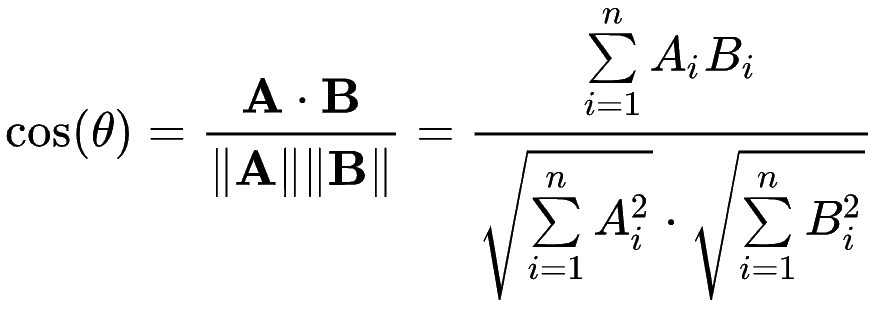



# 3.cosine similarity numerically

In [10]:
'''A - One vector
   B - Another vector
   For example , Lets take [5,6,7] as user 1 and [6,7,8] as user 2
   Lets compute cosine similarity manually'''
import numpy as np
user_1=[5,6,7]
user_1=[6,7,8]
#Dot product
dot_product=(5*6)+(6*7)+(7*8) #A.B
norm_of_user_1=np.sqrt(5**2+6**2+7**2)
norm_of_user_2=np.sqrt(6**2+7**2+8**2)
cosine_similarity=dot_product/(norm_of_user_1*norm_of_user_2)
print(cosine_similarity)

0.9998169448073264


# 4.Cosine similarity matrix

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_movie_matrix.index,
    columns=user_movie_matrix.index)
user_similarity_df.head(10)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941
6,0.429682,0.242106,0.074018,0.068431,0.238636,1.000000,0.493529,0.202514,0.184997,0.554851,...,0.384703,0.112464,0.187093,0.220179,0.138685,0.112729,0.354454,0.145268,0.312264,0.277612
7,0.443097,0.108604,0.067423,0.091507,0.374733,0.493529,1.000000,0.285815,0.146092,0.488501,...,0.459442,0.114526,0.113190,0.120105,0.153818,0.104394,0.330926,0.060175,0.285273,0.395560
8,0.320079,0.104257,0.084419,0.188060,0.248930,0.202514,0.285815,1.000000,0.085942,0.233289,...,0.240152,0.067626,0.094483,0.098024,0.169737,0.096103,0.246883,0.146145,0.176818,0.299809
9,0.078385,0.162470,0.062039,0.101284,0.056847,0.184997,0.146092,0.085942,1.000000,0.198223,...,0.082536,0.048640,0.163667,0.133514,0.118232,0.039937,0.120495,0.143245,0.093287,0.075617


In [14]:
user_movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,2,5,0,0,3,4,0,0,...,0,0,0,5,3,0,0,0,4,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,4,0,0,...,0,0,0,4,0,0,0,0,4,0


# 5.Finding similar user for new user to recommend movies

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

new_user_data = {
    "'Til There Was You (1997)": 0,
    "101 Dalmatians (1996)": 4,
    "12 Angry Men (1957)": 5,
    "2 Days in the Valley (1996)": 0,
    "2001: A Space Odyssey (1968)": 5,
    "Young Guns (1988)": 3,
    "Young Poisoner's Handbook, The (1995)": 0,
    "Zeus and Roxanne (1997)": 0,
    "A Kid in King Arthur's Court (1995)": 2
}


In [16]:
# Convert to DataFrame
new_user_df = pd.DataFrame([new_user_data])
# Reindex to match full matrix columns
new_user_df = new_user_df.reindex(columns=user_movie_matrix.columns, fill_value=0)
# Append new user to the matrix
extended_matrix = pd.concat([user_movie_matrix, new_user_df], ignore_index=True)

In [19]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(extended_matrix)

# Get similarity scores for the new user (last row)
new_user_similarities = similarity_matrix[-1][:-1]  # exclude self-comparison

# Final best user

In [21]:
# Find index of most similar existing user
most_similar_user_index = new_user_similarities.argmax()
most_similar_user_id = user_movie_matrix.index[most_similar_user_index]
print(f"Most similar user ID: {most_similar_user_id}")
print(f"Similarity score: {new_user_similarities[most_similar_user_index]:.4f}")

Most similar user ID: 573
Similarity score: 0.1704
